Solve the one-dimensional wave equation

$$
\frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0 
,\quad a = \frac{1}{2}
$$

with

$$
u(x, 0) = \frac{1}{2}(1 + \tanh[250(x - 20)]), \quad 0 \le x \le 40
$$

Choose initially 41 grid point mesh with $\Delta x = 1$ and compute to $t = 10$

In [2]:
%load_ext autoreload

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%aimport linear_advection
%matplotlib inline
%autoreload 1

In [4]:
execfile('../../matplotlibrc.py')

## Question 1

Let's overplot the solution for all schemes with the following conditions:
\begin{align*}
\Delta x &= 1.0\\
\Delta t &= 1.0\\
CFL &= a\frac{\Delta t}{\Delta x} = 0.5
\end{align*}

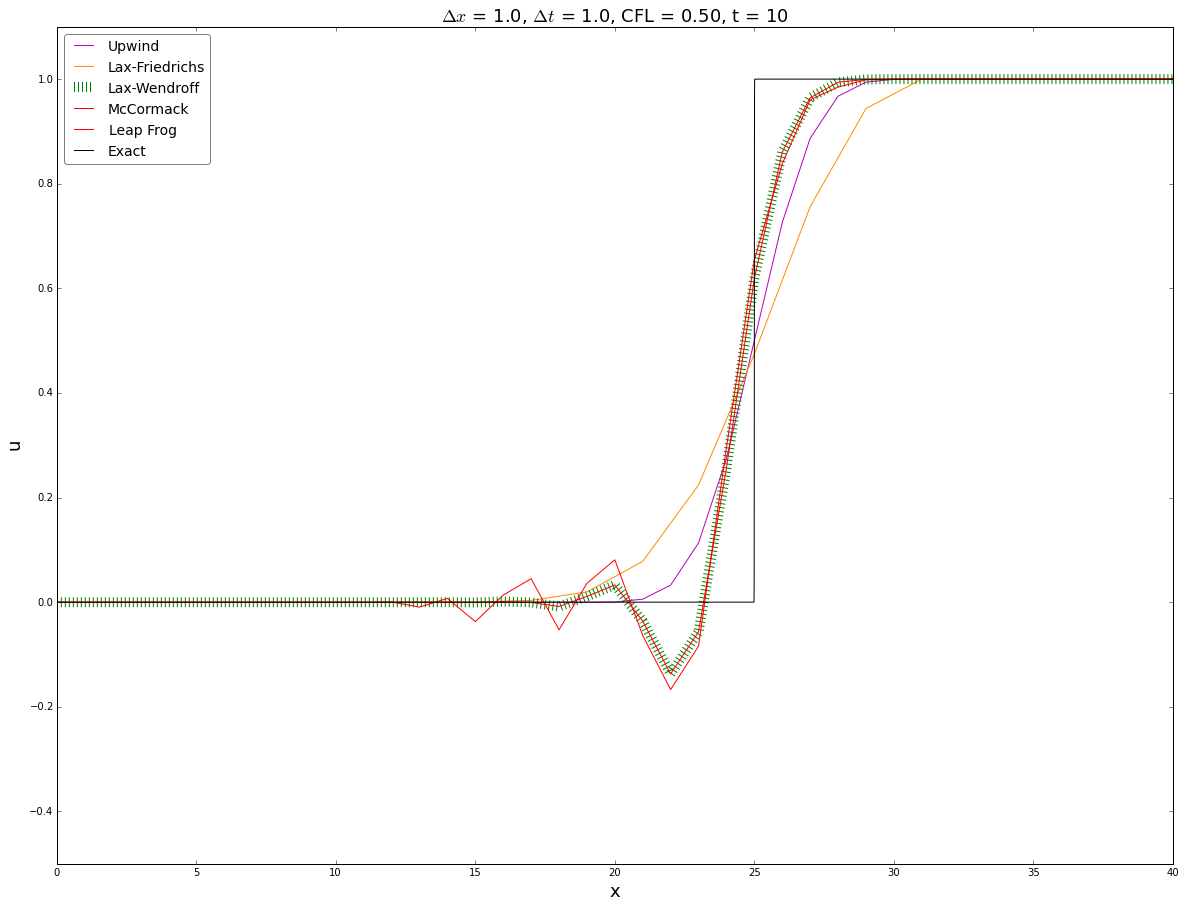

In [5]:
linear_advection.q1(dt=1.0, dx=1.0, xlim=(0, 40))
plt.show()

It is easy to see that the Upwind and Lax-Friedrichs exhibit primarily *dissipative* errors, meaning they reduce the sharpness of the wave. Of course, some of this is due to the coarseness of the grid which makes it impossible to capture what is basically a step function. 

On the other hand, the Lax-Wendroff, McCormack and Leap Frog solutions are dominated by dispersion errors, as can be seen by the oscillations prior to the large curvature region. 

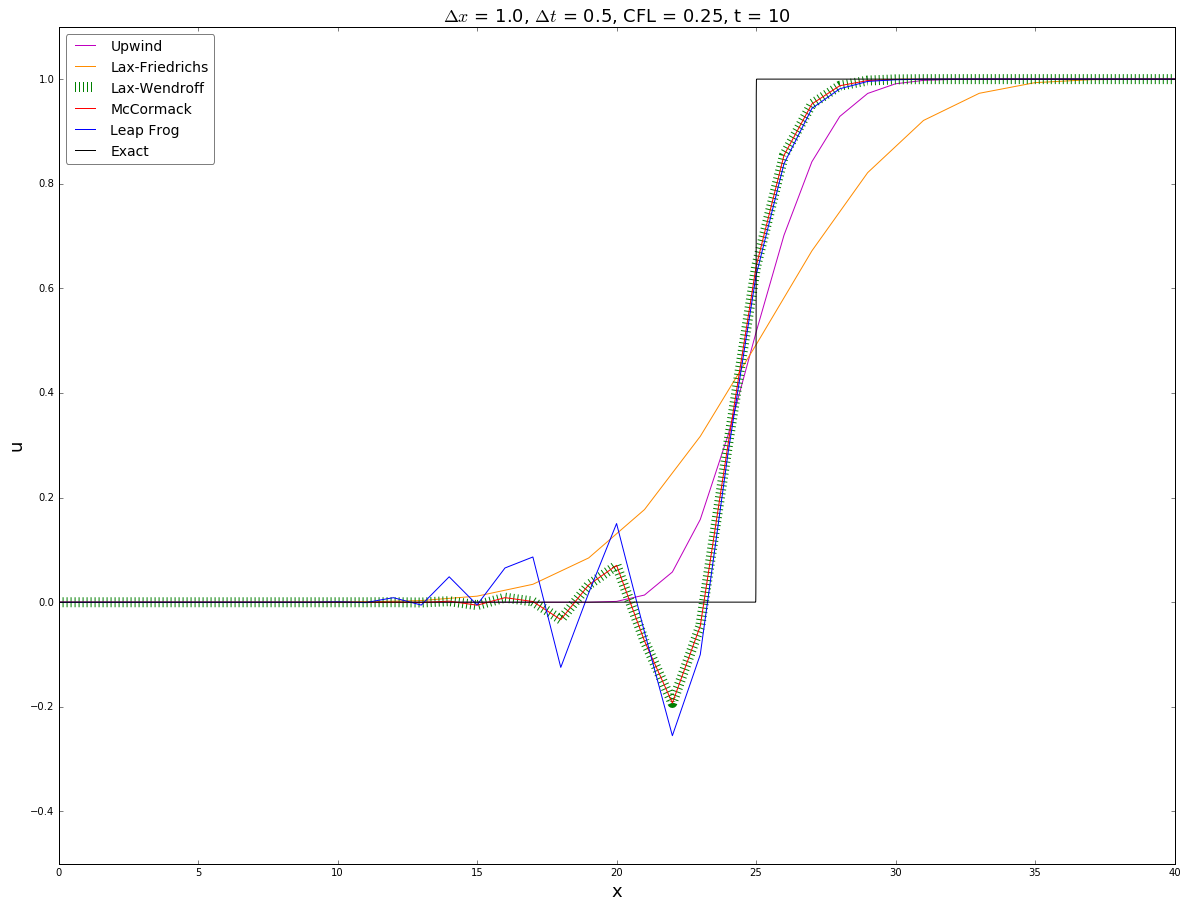

In [10]:
linear_advection.q1(dt=0.5, dx=1.0, xlim=(0, 40))
plt.show()

The same conclusions as above, can be drawn. In fact, both the dissipativeness and dispersiveness have been amplified due to the reduction in CFL.

---

## Questions 2 & 3

In [11]:
# linear_advection.calcs_q2()

*Upwind and Lax-Wendroff have been chosen*

The goal of this question is to perform a grid refinement study. Now, in order to maintain the CFL under 1 and maintain stability, one must also reduce the timestep. Thus, $\Delta x$ was reduced while keeping a CFL of 0.75, from which the required time step size $\Delta t$ was evaluated. The first plot below shows the solutions for both
schemes at various grid sizes. The second plot shows the evolution of the error for each scheme on a *loglog* plot. 

The error was calculated as follows:
$$
E = \sqrt{
    \frac{e_1^2 + e_2^2 + \ldots + e_{N-1}^2 + e_N^2}
    {N}
}
$$
The errors $e_i$ are calculated at each discrete grid point:
$$
e_i = \hat{u}(x_i, t) - u(x_i, t)
$$
where $\hat{u}$ is the approximate solution and $u$ is the exact solution. 

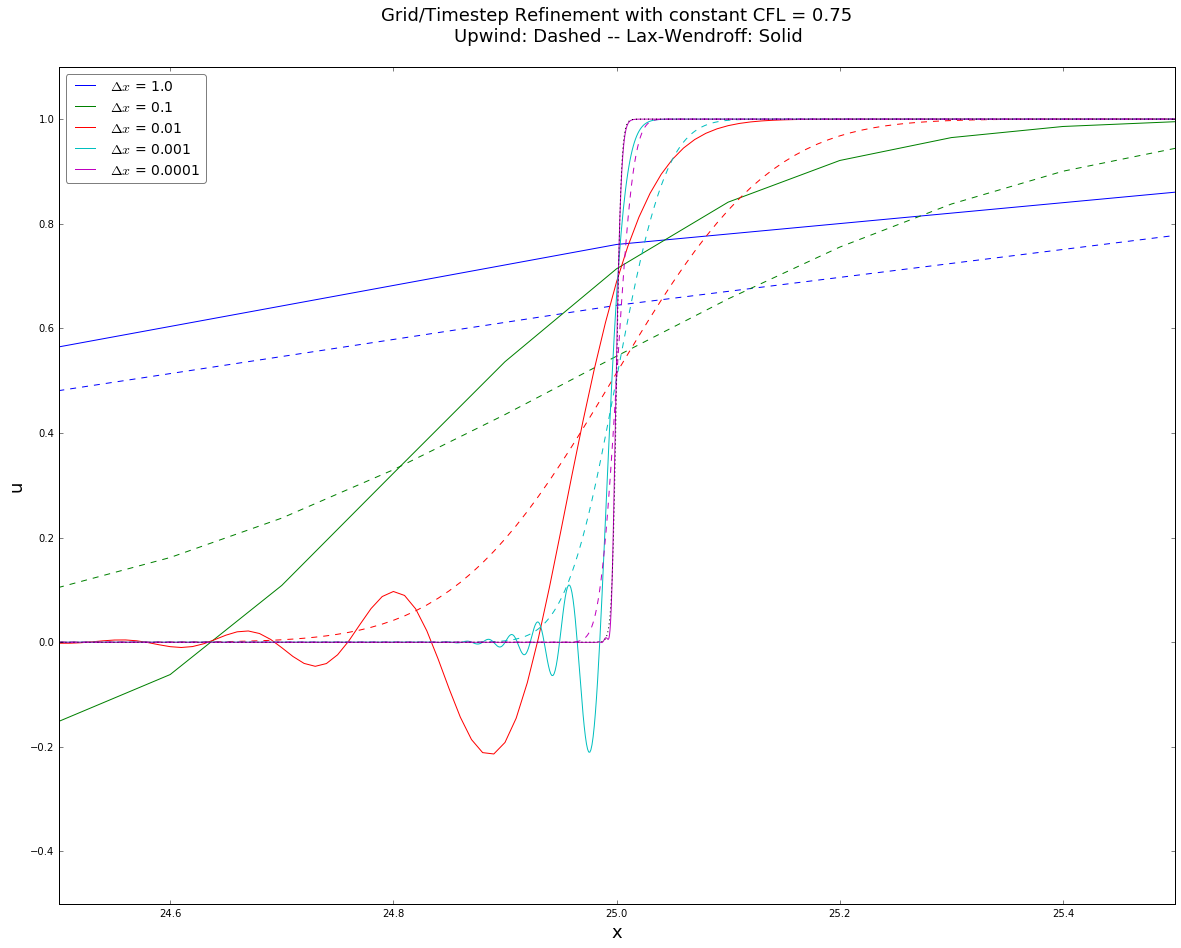

In [44]:
linear_advection.q2_1()

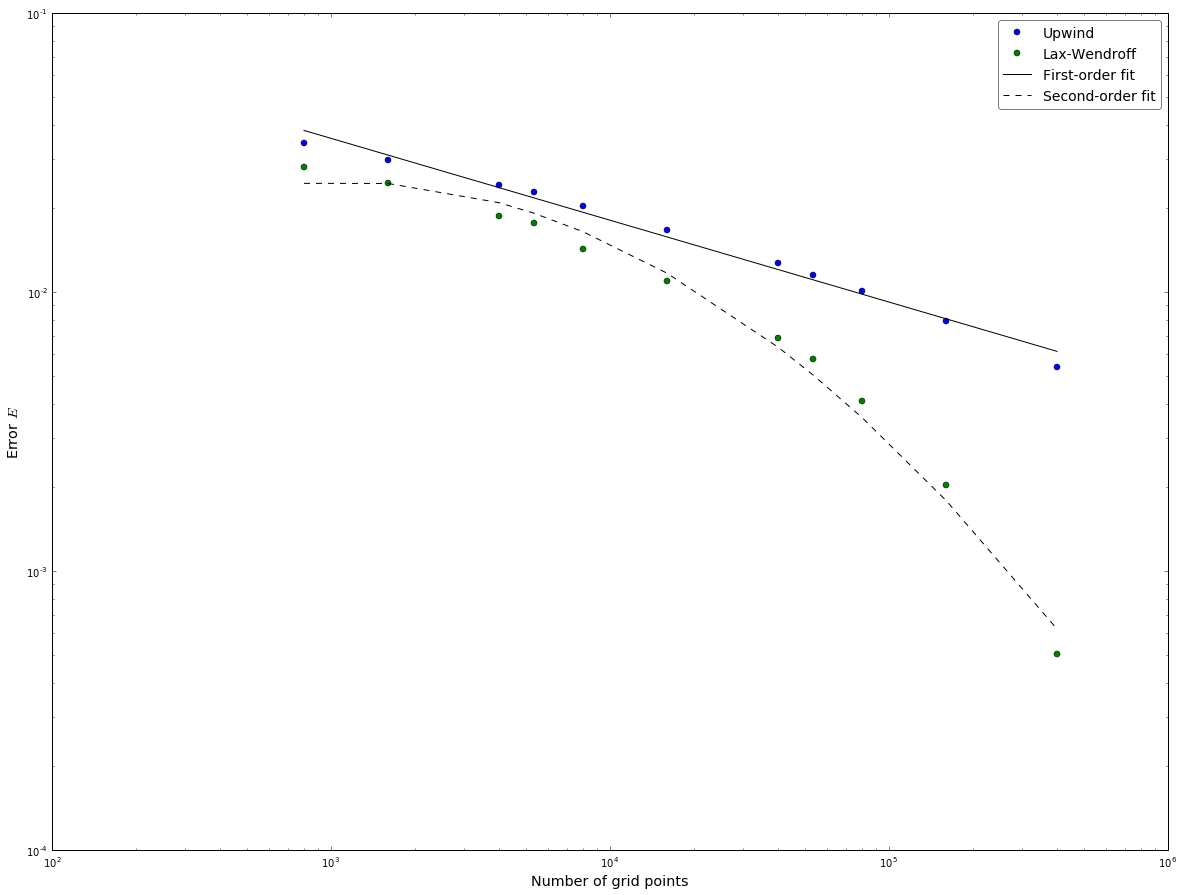

In [43]:
linear_advection.q2_2()

From both plots, it is safe to say that the error decreases for both schemes as the grid/timestep is refined. However, the error decreases *faster* for the Lax-Wendroff solution than the Upwind solution. 

As a matter of fact, the error plot shows that the Upwind error follows a linear trend, while that of Lax-Wendroff follows a quadratic one. This is what is called *order of accuracy* and is a measure of both the size of the error and its rate of decline. 

Now, it is well known that the Upwind scheme is a *first-order* accurate scheme, while Lax-Wendroff is *second-order* accurate. This matches the polynomial fits!

---

## Question 4 -- Analytical

*Upwind and Lax-Wendroff have been chosen*

We now turn our attention to *stability*. In order for a scheme to be stable, it must exhibit a gain in error amplitude below or equal to unity. In other words, the error at the next timestep must not be allowed to grow beyond its value at the current timestep. 

In this section, we show the stability condition for both chosen schemes. 

### Upwind

$$
u_j^{n+1} = u_j^n - \nu(u_j - u_{j-1}^n)
$$
Substitute $u_j^n = e^{at}e{i k_m x}$ and divide by $e^{at}e{i k_m x}$:
\begin{gather*}
\underbrace{e^{a\Delta t}}_G = 1 - \nu \left(1 - e^{-i\beta}\right) \\
\Rightarrow G = 1 - \nu + \nu e^{-i\beta} = 1 - \nu + \nu \cos(\beta) - i \nu \sin(\beta)
\end{gather*}
We require $|G|^2 \le 1$ for stability.
\begin{align*}
|G|^2 =& Re^2 + Im^2 = \left(1 - \nu + \nu \cos(\beta)\right)^2 + \nu^2\sin^2(\beta)\\
& \underbrace{\nu^2\sin^2\beta + \nu^2\cos^2\beta}_{\nu^2} - 2\nu^2\cos\beta + \nu^2 + 2\nu\cos\beta - 2\nu + 1 \le 1\\
& 2\nu^2\left(1 - \cos\beta\right) - 2\nu\left(1 - \cos\beta\right) \le 0\\
& \underbrace{2\nu}_{\ge 0}\underbrace{\left(1 - \cos\beta\right)}_{\ge 0}\left(\nu - 1\right) \le 0\\
\end{align*}
Which means we must have the following for stability:
$$
\nu - 1 \le 0 \quad \Rightarrow \quad \nu = A\frac{\Delta t}{\Delta x} \le 1
$$

### Lax-Wendroff

$$
u_j^{n+1} = u_j^n - \frac{\nu}{2}(u_{j+1}^n - u_{j-1}^n) + \frac{\nu^2}{2}(u_{j+1}^n - 2u_j^n + u_{j-1}^n)
$$
Same as before, plug in error function for $u$:
\begin{align*}
e^{a\Delta t} &= 1 - \frac{\nu}{2}\left(e^{i\beta} - e^{-i\beta}\right) 
+ \frac{\nu^2}{2}\left(e^{i\beta} + e^{-i\beta} -2 \right)\\
&= 1 - i\nu\sin\beta + \nu^2\cos\beta _ \nu^2\\
\Rightarrow& |G|^2 = \left(1 + \frac{\nu^2}{2}\cos\beta - \nu^2\right)^2 + \nu^2\sin^2\beta \le 1
\end{align*}
From now on, let $\sin\beta = \sin$ and $\cos\beta = \cos$, for brevity. 
\begin{align*}
& \nu^4\cos^2 - 2\nu^4\cos + \nu^4 + \nu^2\sin^2 + 2\nu^2\cos - 2\nu^2 \le 0\\
& \nu^2\left[\nu^2\cos^2 - 2\nu^2\cos + \nu^2 + 2\cos + 
    \underbrace{\left(\sin^2 - 1\right)}_{-\cos^2} - 1 \right] \le 0\\
& \nu^2\left[
    \nu^2\left(\cos^2 - 2\cos + 1\right) - 1\underbrace{\left(\cos^2 - 2\cos + 1\right)}_{(\cos - 1)^2}
\right] \le 0\\
& \underbrace{\nu^2}_{\ge 0} \underbrace{ \left( \cos - 1 \right)^2 }_{\ge 0} \left(\nu^2 -1\right) \le 0
\end{align*}
Which means we must have the following for stability:
$$
\nu^2 - 1 \le 0 \quad \Rightarrow \quad \nu = A\frac{\Delta t}{\Delta x} \le 1
$$

## Question 4 -- Numerical

The stability condition was derived above for both schemes to be:
$$
CFL = A\frac{\Delta t}{\Delta x} \le 1
$$
Thus, both schemes are *conditionally stable*, that is, they must satisfy the condition above in order to achieve stability.

The plot below shows a time evolution of the wave amplitude at various CFLs. The wave amplitude was calculated for each time step as follows:
$$
G^n = \max\big| u^n_i - 0.5 \big|
$$
0.5 was subtracted because it is the average value of the wave. It should be noted that the exact wave amplitude is also 0.5.

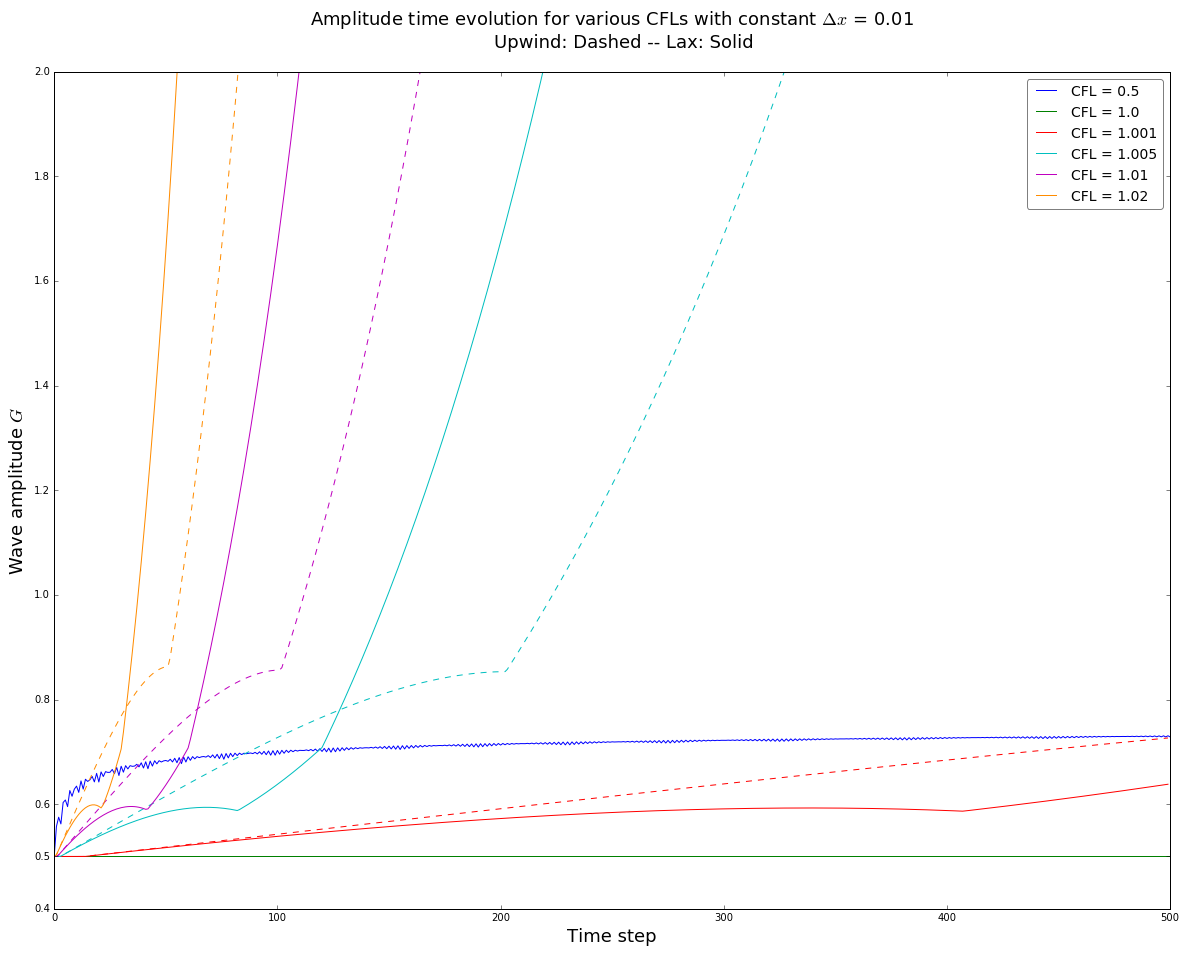

In [29]:
linear_advection.q4(0.01)

There is a lot of information in the above graph:

* Even at a so-called stable CFL of 0.75, the Lax-Wendroff's dominant dispersive error makes the amplitude grow at every time step. On the other hand, the Upwind scheme retains a constant amplitude of 0.5, which is the exact amplitude, due to the dominance of dissipative errors. 
* At a CFL of exactly 1, *both* schemes give the exact amplitude. This makes sense with what we learned in class: the *exact solution* is attained for a CFL of unity, that is, neither dissipative nor dispersive errors are introduced. 
* The wave amplitude starts to grow at a CFL as low as 1.001, even for the upwind scheme. The theoretical stability condition is therefore **confirmed**. 

---

## Question 5

*Lax-Wendroff has been chosen*

Finally, *consistency* is investigated. We define a consistent scheme to be one that yields the exact solution when the time step size and grid size tend to 0. 

$$
u_j^{n+1} - u_j^n + \frac{\nu}{2}(u_{j+1}^n - u_{j-1}^n) - \frac{\nu^2}{2}(u_{j+1}^n - 2u_j^n + u_{j-1}^n) = 0
$$

Plug in Taylor series expansion into the above to get:
\begin{align*}
& u_t + \frac{1}{2}u_{tt}\Delta t + \frac{1}{6} u_{ttt}\Delta t^2 + O(\Delta t^3)\\
&+ A\left[ u_x + \frac{1}{6}u_{xxx}\Delta x^2 + O(\Delta x^4) \right] - A^2\Delta t \left[ \frac{1}{2}u_{xx} + O(\Delta x^2) \right] = 0
\end{align*}
Rearrange terms:
$$
(u_t + A u_x) + \frac{\Delta t}{2}\left[ u_tt - A^2 u_xx \right] + \frac{1}{6}\Delta t^2 + \frac{A}{6}u_{xxx}\Delta x^2 + O(\Delta t^3, \Delta x^2\Delta t)
$$
We can show that the term in square brackets is identically zero. Differentiate on both sides of the linear advection equation by $t$ and $x$ to get:
\begin{align*}
\frac{\partial}{\partial t}(u_t + A u_x) &= u_{tt} + Au_{xt} = 0\\
\frac{\partial}{\partial x}(u_t + A u_x) &= u_{tx} + Au_{xx} = 0
\end{align*}
combining both equations, we get:
$$
u_{tt} - A^2u_{xx} = 0
$$
Thus, the truncation error of the Lax-Wendroff scheme is:
$$
\epsilon = \frac{1}{6}u_{ttt}\Delta t^2 + \frac{A}{6}u_{xxx}\Delta x^2 + O(\Delta t^3, \Delta x^2\Delta t)
$$
and thus we can say that $\epsilon \rightarrow 0$ as $\Delta t, \Delta x \rightarrow 0$

We've also shown the scheme is second-order accurate in time and space.

### Numerical

As far as the numerical part goes, looking at the results from Questions 2 & 3 tells us that the error is decreasing as the grid is refined. 